In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
path_zip = tf.keras.utils.get_file('cats_and_dogs.zip',origin = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip",extract = True)

path = os.path.join(os.path.dirname(path_zip),'cats_and_dogs_filltered')

68608000/68606236 [==============================] - 10s 0us/step


In [2]:
train_dir = os.path.join(path,'train')
validation_dir = os.path.join(path,'validation')

NameError: name 'path' is not defined

In [4]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [46]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 100
IMG_WIDTH = 100

In [47]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)


In [48]:
train_set = train_image_generator.flow_from_directory(
        'cats_and_dogs_filtered/train',
        target_size=(IMG_HEIGHT,IMG_WIDTH),
        batch_size=128,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [49]:
test_set = validation_image_generator.flow_from_directory(
                'cats_and_dogs_filtered/validation',
                 target_size = (IMG_HEIGHT,IMG_WIDTH),
                 batch_size =128,
                 class_mode =  'binary')

Found 1000 images belonging to 2 classes.


In [24]:
sample_images_tr, _ = next(train_set)

In [25]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

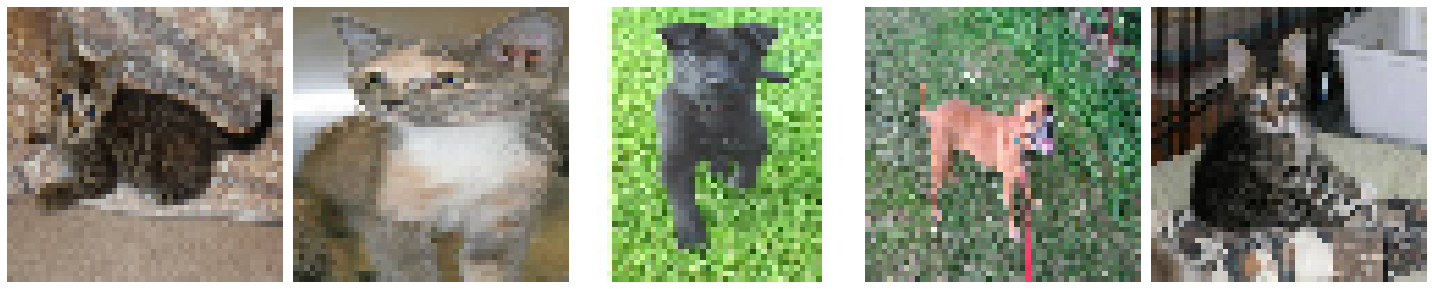

In [26]:
plotImages(sample_images_tr[:5])

In [27]:
model = Sequential([
    Conv2D(16,3, padding = 'same',activation = 'relu',input_shape = (IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(32,3, padding = 'same',activation = 'relu'),
    MaxPooling2D(),
    Conv2D(64,3, padding = 'same',activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

    

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [29]:
model.compile(optimaizer = 'adam',
             loss = 'binary_crossentropy',
             metrics  = ["accuracy"] )

In [37]:
history = model.fit_generator(train_set,
                              steps_per_epoch = 2000 // batch_size,
                              epochs = 15,
                              validation_steps = 1000 // batch_size,
                              validation_data = train_set,
                            )

Epoch 1/15
15/15 [==============================] - 15s 1s/step - loss: 0.6182 - accuracy: 0.6554 - val_loss: 0.5892 - val_accuracy: 0.6786
Epoch 2/15
15/15 [==============================] - 15s 988ms/step - loss: 0.5894 - accuracy: 0.6902 - val_loss: 0.5449 - val_accuracy: 0.7344
Epoch 3/15
15/15 [==============================] - 14s 963ms/step - loss: 0.5550 - accuracy: 0.7185 - val_loss: 0.8241 - val_accuracy: 0.5301
Epoch 4/15
15/15 [==============================] - 14s 936ms/step - loss: 0.5736 - accuracy: 0.7142 - val_loss: 0.5657 - val_accuracy: 0.7132
Epoch 5/15
15/15 [==============================] - 14s 933ms/step - loss: 0.5104 - accuracy: 0.7552 - val_loss: 0.4543 - val_accuracy: 0.7801
Epoch 6/15
15/15 [==============================] - 14s 909ms/step - loss: 0.5112 - accuracy: 0.7676 - val_loss: 0.4285 - val_accuracy: 0.8125
Epoch 7/15
15/15 [==============================] - 13s 867ms/step - loss: 0.4866 - accuracy: 0.7637 - val_loss: 0.4000 - val_accuracy: 0.8493
Ep

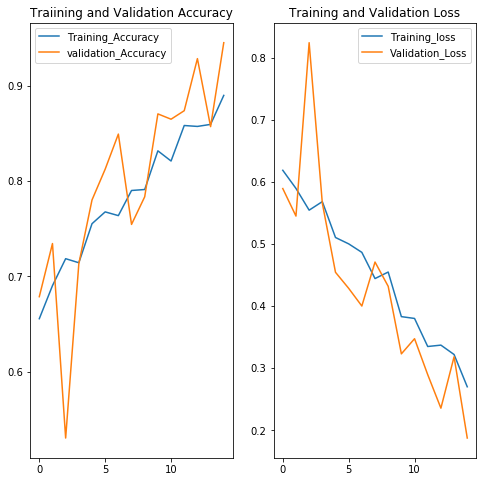

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_range = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epoch_range,acc,label = 'Training_Accuracy')
plt.plot(epoch_range,val_acc,label = 'validation_Accuracy')
plt.legend(loc = 'best')
plt.title("Traiining and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epoch_range,loss,label='Training_loss')
plt.plot(epoch_range,val_loss,label = 'Validation_Loss')
plt.legend(loc = 'best')
plt.title("Training and Validation Loss")
plt.show()



In [78]:
img_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True) 

In [79]:
train_data_gen = img_gen.flow_from_directory(batch_size = batch_size,
                                             directory = 'cats_and_dogs_filtered/train',
                                             shuffle = True,
                                             target_size = (IMG_HEIGHT,IMG_WIDTH)
                                             )

Found 2000 images belonging to 2 classes.


In [80]:
Augumented_images = [train_data_gen[0][0][0] for i in range(5)]


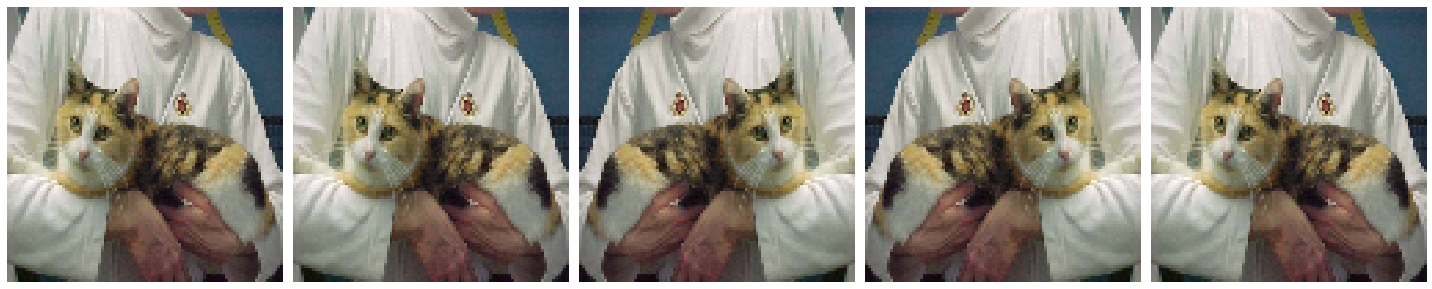

In [81]:
plotImages(Augumented_images)

Found 2000 images belonging to 2 classes.


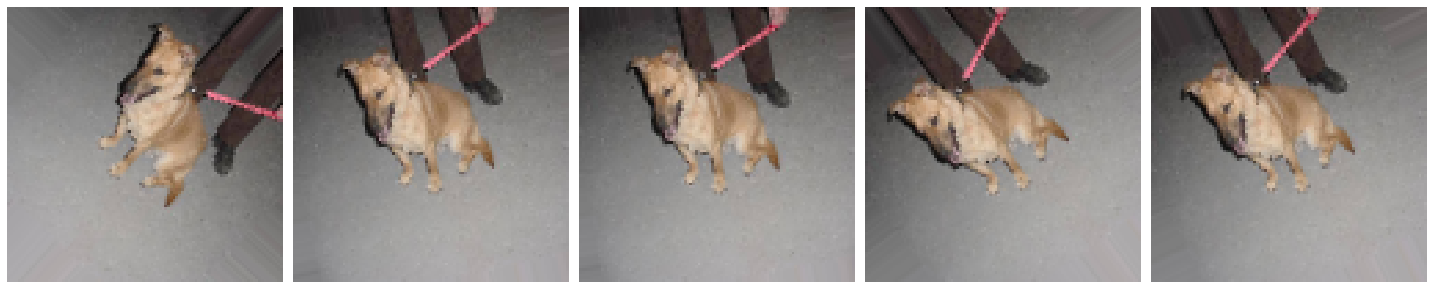

In [82]:
img_gen = ImageDataGenerator(rescale = 1./255,rotation_range = 45)

train_data_gen = img_gen.flow_from_directory(batch_size = batch_size,
                                            directory = 'cats_and_dogs_filtered/train',
                                             shuffle = True,
                                             target_size = (IMG_HEIGHT,IMG_WIDTH)
                                            )
augumen_imges = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augumen_imges)

In [83]:
img_gen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5)

train_image_generation = img_gen.flow_from_directory(shuffle = True,
                                                    directory = 'cats_and_dogs_filtered/train',
                                                    target_size = (IMG_HEIGHT,IMG_WIDTH),
                                                    batch_size = batch_size)

Found 2000 images belonging to 2 classes.


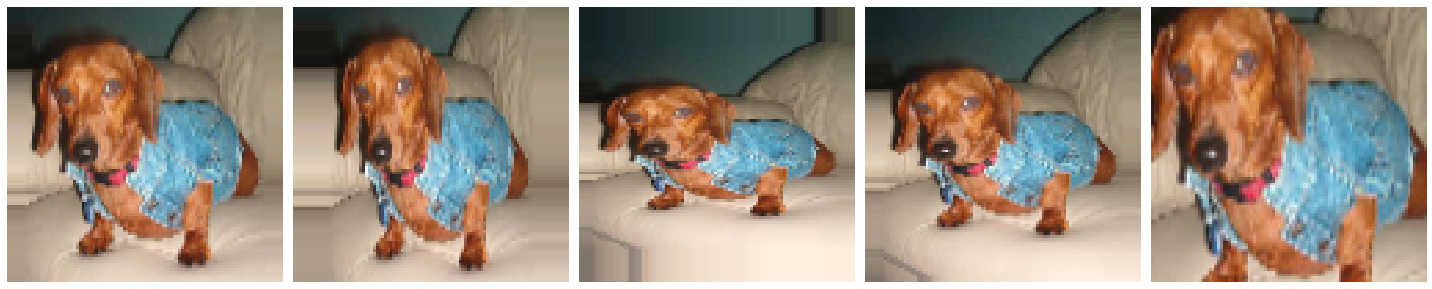

In [84]:
augumen = [train_image_generation[0][0][0] for i in range(5)]
plotImages(augumen)

In [85]:
img_gen = ImageDataGenerator(rescale = 1./255,
                            zoom_range = 0.5,
                            rotation_range = 45,
                            horizontal_flip = True)

Found 2000 images belonging to 2 classes.


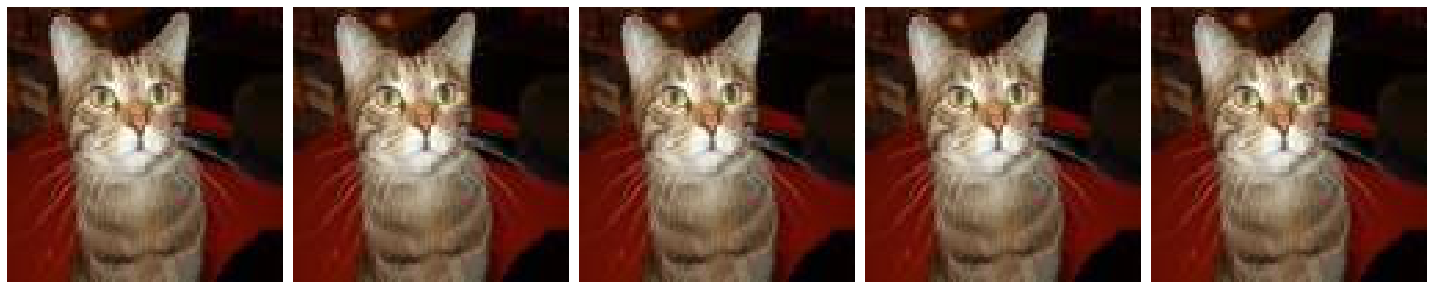

In [96]:
train_image_generator = img_gen.flow_from_directory(shuffle = True,
                                                    batch_size = batch_size,
                                                    directory = 'cats_and_dogs_filtered/train',
                                                    target_size = (100,100),
                                                   class_mode = 'binary')

aug  = [train_image_generator[0][0][0] for i in range(5)]
plotImages(aug)

In [97]:
img_gen = ImageDataGenerator(rescale = 1./255)

validation_data_gen = img_gen.flow_from_directory(shuffle = True,
                                                 batch_size = batch_size,
                                                 target_size = (100,100),
                                                 directory = 'cats_and_dogs_filtered/validation',
                                                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [98]:
model2 = Sequential([Conv2D(16,3, padding = 'same', activation = 'relu',input_shape = (100,100,3)),
                    MaxPooling2D(),
                    Dropout(0.2),
                    Conv2D(32,3, padding = 'same', activation = 'relu'),
                    MaxPooling2D(),
                    Conv2D(64,3, padding = 'same', activation = 'relu'),
                    MaxPooling2D(),
                    Dropout(0.2),
                    Flatten(),
                    Dense(512, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
                    ])

In [99]:
model2.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [100]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 64)       

In [102]:
history = model2.fit_generator(train_image_generator,
                              epochs = epochs,
                              steps_per_epoch = 2000//  batch_size,
                              validation_data= validation_data_gen,
                              validation_steps = 1000 // batch_size,
                              
                              )

Epoch 1/15
15/15 [==============================] - 36s 2s/step - loss: 0.7440 - accuracy: 0.4920 - val_loss: 0.6921 - val_accuracy: 0.5100
Epoch 2/15
15/15 [==============================] - 25s 2s/step - loss: 0.6897 - accuracy: 0.4979 - val_loss: 0.6817 - val_accuracy: 0.5033
Epoch 3/15
15/15 [==============================] - 26s 2s/step - loss: 0.6731 - accuracy: 0.5698 - val_loss: 0.6554 - val_accuracy: 0.6183
Epoch 4/15
15/15 [==============================] - 25s 2s/step - loss: 0.6531 - accuracy: 0.6299 - val_loss: 0.6335 - val_accuracy: 0.6339
Epoch 5/15
15/15 [==============================] - 26s 2s/step - loss: 0.6255 - accuracy: 0.6651 - val_loss: 0.6094 - val_accuracy: 0.6775
Epoch 6/15
15/15 [==============================] - 25s 2s/step - loss: 0.5924 - accuracy: 0.6798 - val_loss: 0.6225 - val_accuracy: 0.6629
Epoch 7/15
15/15 [==============================] - 25s 2s/step - loss: 0.5971 - accuracy: 0.6964 - val_loss: 0.5800 - val_accuracy: 0.7098
Epoch 8/15
15/15 [==

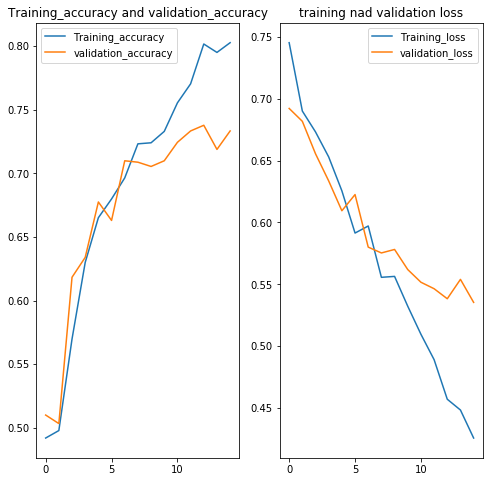

In [105]:
accuracy = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epoch_range = range(epochs)

plt.figure(figsize  = (8,8))
plt.subplot(1,2,1)
plt.plot(epoch_range,accuracy,label = 'Training_accuracy')
plt.plot(epoch_range,val_acc, label = 'validation_accuracy')
plt.legend(loc = 'best')
plt.title("Training_accuracy and validation_accuracy")


plt.subplot(1,2,2)
plt.plot(epoch_range,loss,label = 'Training_loss')
plt.plot(epoch_range,val_loss,label = 'validation_loss')
plt.legend(loc = 'best')
plt.title("training nad validation loss")

plt.show()